# Visualisations


In [23]:
import matplotlib.pyplot as plt 
import pandas as pd

In [24]:
condtion=pd.read_csv('features7/AFIB.csv',low_memory=False).apply(pd.to_numeric,errors='coerce')
control=pd.read_csv('features7/SR.csv',low_memory=False).iloc[:5000].apply(pd.to_numeric,errors='coerce')

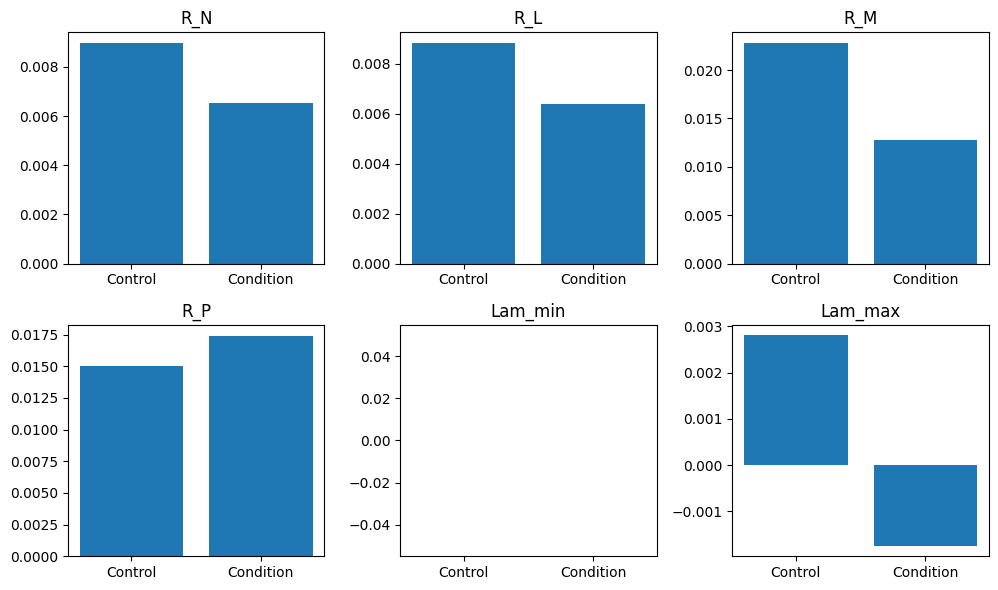

In [25]:
fields = ['R_N', 'R_L', 'R_M', 'R_P', 'Lam_min', 'Lam_max']

controlPlot=[control[f].mean() for f in fields]
conditionPlot=[condtion[f].mean() for f in fields]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, field in enumerate(fields):
    ax = axes[i // 3, i % 3]
    ax.bar(['Control', 'Condition'], [controlPlot[i], conditionPlot[i]])
    ax.set_title(field)
plt.tight_layout()


plt.show()

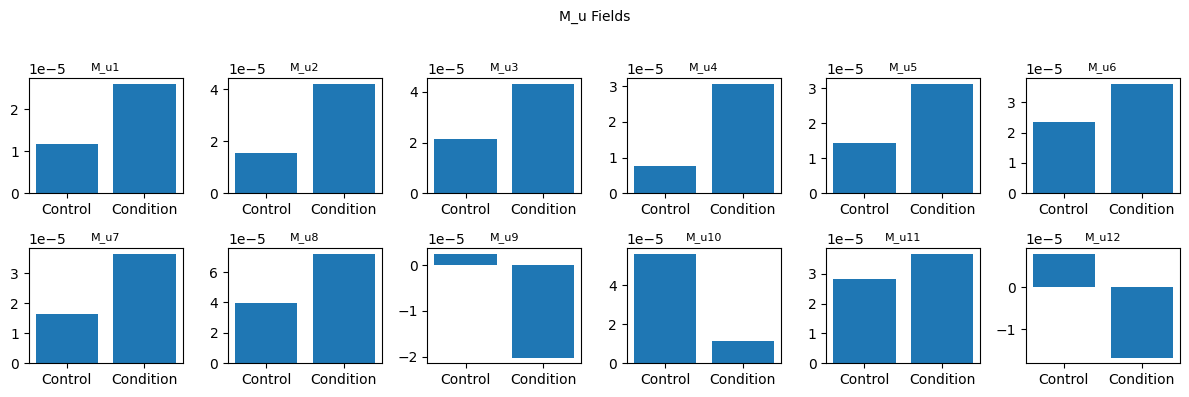

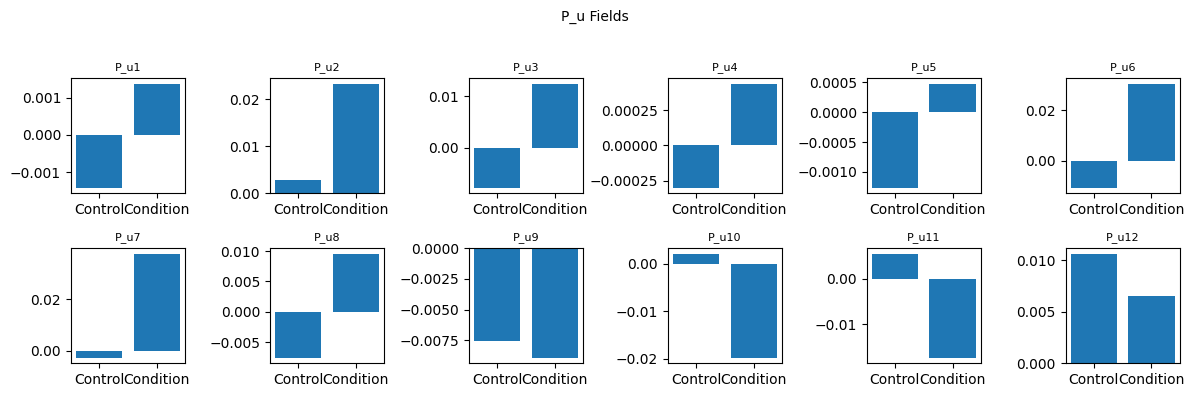

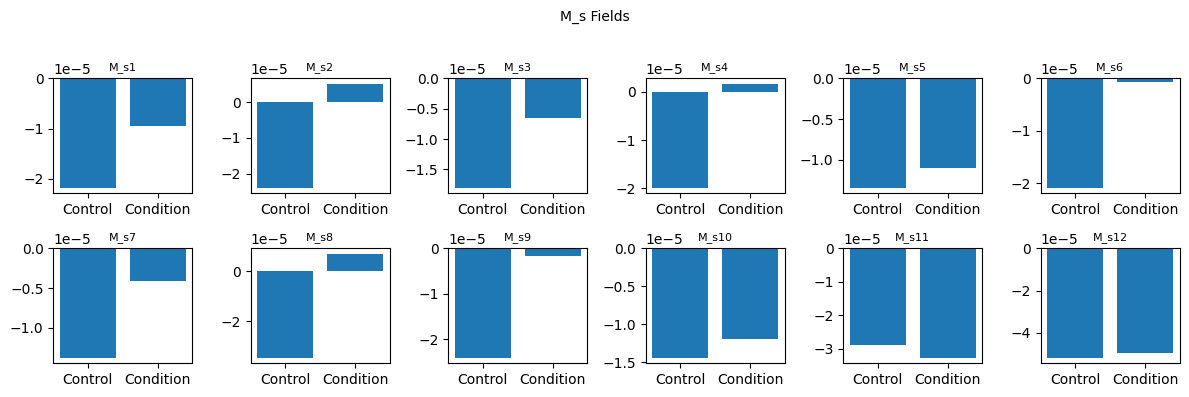

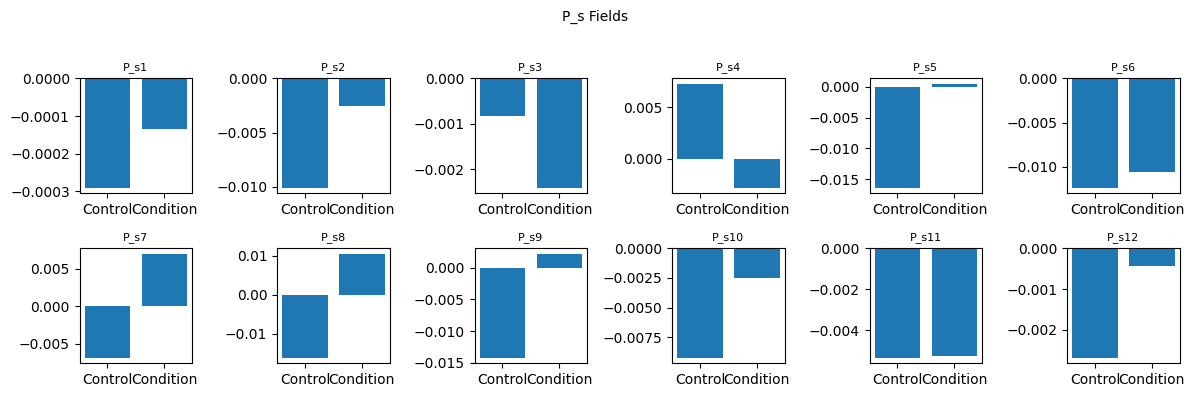

In [26]:
import matplotlib.pyplot as plt

M_u_fields = [f for f in control.columns if f.strip().startswith('M_u')]
P_u_fields = [f for f in control.columns if f.strip().startswith('P_u')]
M_s_fields = [f for f in control.columns if f.strip().startswith('M_s')]
P_s_fields = [f for f in control.columns if f.strip().startswith('P_s')]

# Create a function to plot fields in separate subplots
def plot_fields(fields, title):
    num_plots = len(fields)
    cols = 6
    rows = 2
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4))  # Smaller size for compactness
    
    for i, field in enumerate(fields):
        ax = axes[i // cols, i % cols]
        ax.bar(['Control', 'Condition'], [control[field].mean(), condtion[field].mean()])
        ax.set_title(field.strip(), fontsize=8)  # Smaller title font size
    
    # Hide any unused subplots
    for j in range(num_plots, rows * cols):
        axes[j // cols, j % cols].axis('off')

    plt.suptitle(title, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

# Plot each category separately
plot_fields(M_u_fields, 'M_u Fields')
plot_fields(P_u_fields, 'P_u Fields')
plot_fields(M_s_fields, 'M_s Fields')
plot_fields(P_s_fields, 'P_s Fields')
